In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm

## Загрузка набора данных и предварительный анализ

In [2]:
def draw_pictures(img_df):
    n = len(img_df)
    cols = 5
    if n < cols:
        cols = n
    rows = n//cols+1 if (n/cols > n//cols) else n//cols
    plt.subplots(squeeze=False, figsize=(10,10))
    for i in range(n):
        plt.subplot2grid((rows, cols), (i//cols, i%cols)).imshow(imread(df['path'][i]))

In [3]:
def draw_image_hist(img_path):
    image = imread(img_path)
    plt.hist(image.ravel(), bins = 256, color = 'orange', )
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity Value')
    plt.ylabel('Count')
    plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
  

In [4]:
def draw_pictures_with_hists(img_df):
    n = len(img_df)
    cols = 5
    if n < cols:
        cols = n
    rows = n//cols+1 if (n/cols > n//cols) else n//cols
    fig, axes = plt.subplots(rows*2, cols, figsize=(cols*5,rows*10))
    plt.suptitle('Different degree curves')
    row_i =0
    for i in range(n):
        image = imread(df['path'][i])
        axes[row_i, i%cols].hist(image.ravel(), bins = 256, color = 'orange', )
        axes[row_i, i%cols].hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
        axes[row_i, i%cols].hist(image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
        axes[row_i, i%cols].hist(image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
        axes[row_i, i%cols].legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
        axes[row_i, i%cols].set_xlabel('Intensity Value')
        axes[row_i, i%cols].set_ylabel('Count')
        axes[row_i+1, i%cols].imshow(image)
        if (i%cols+1 == cols):
            row_i += 2

        

In [6]:
image_path = "../data/Raw/"
image_files = []
global classes_dict 
classes_dict = {}
for k, dir in enumerate(os.listdir(image_path)):
    classes_dict[dir.lower()] = k
    image_files.extend(os.path.join(image_path, dir, file) for file in os.listdir(os.path.join(image_path, dir)) if file.endswith(('.JPG', '.jpg')))

In [7]:
for class_title, class_number in classes_dict.items():
    print (f"Класс: \033[1m{class_title}\033[0m - номер {class_number}")

Класс: bottle_opener - номер 0
Класс: bread_knife - номер 1
Класс: can_opener - номер 2
Класс: dessert_spoon - номер 3
Класс: dinner_fork - номер 4
Класс: dinner_knife - номер 5
Класс: fish_slice - номер 6
Класс: kitchen_knife - номер 7


In [8]:
def img_params(img_path):
    img = imread(img_path) 
    img_class = img_path.replace(image_path, '').split('\\')[0].lower()
    return classes_dict[img_class], img_path, img.shape[0], img.shape[1], img.shape[2], img.max(), img.min(), img.mean(), img.std()

In [9]:
images_data = np.array(list(map(img_params, image_files)))

In [10]:
df = pd.DataFrame(columns=['img_class','path','height', 'width', 'dimension', 'max_rgb', 'min_rgb', 'mean_rgb', 'std_rgb'], data=images_data)
df = df.astype({'height': 'int32', 'width': 'int32', 'dimension': 'int32', 'max_rgb': 'float32',
          'min_rgb': 'float32', 'mean_rgb': 'float32', 'std_rgb': 'float32'})


img_class - класс, к которому относится изображение

path - путь к файлу изображения

height - высота изображения

width - ширина изображения

dimension - количество цветовых каналов изображения

max_rgb - максимальное значение пикселя в изображении

min_rgb - минимальное значение пикселя в изображении

mean_rgb - среднее значение пикселя в изображении

std_rgb  - стандартное отклонение значения пикселя в изображении



In [11]:
print('Первые 5 строчек датасета:')
df.head()

Первые 5 строчек датасета:


,img_class,path,height,width,dimension,max_rgb,min_rgb,mean_rgb,std_rgb
0,0,../data/Raw/BOTTLE_OPENER\bottleopenerraw1.JPG,1536,2048,3,255.0,0.0,54.986946,34.352425
1,0,../data/Raw/BOTTLE_OPENER\bottleopenerraw10.JPG,1536,2048,3,255.0,0.0,138.947037,68.768059
2,0,../data/Raw/BOTTLE_OPENER\bottleopenerraw11.JPG,1536,2048,3,255.0,0.0,145.557602,69.073090
3,0,../data/Raw/BOTTLE_OPENER\bottleopenerraw12.JPG,1536,2048,3,255.0,0.0,129.254044,68.981476
4,0,../data/Raw/BOTTLE_OPENER\bottleopenerraw13.JPG,1536,2048,3,255.0,0.0,132.945312,62.024948


Первые 5 изображений датасета:


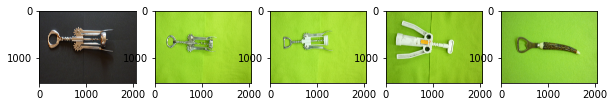

In [12]:
print('Первые 5 изображений датасета:')
draw_pictures(df[:5])

In [14]:
print(f'Количество фотографий в датасете: {df.shape[0]}')
print('Количество отсутствующих значений в датасете и типы данных по столбцам:\n')
print(df.info())

Количество фотографий в датасете: 340
Количество отсутствующих значений в датасете и типы данных по столбцам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   img_class  340 non-null    object 
 1   path       340 non-null    object 
 2   height     340 non-null    int32  
 3   width      340 non-null    int32  
 4   dimension  340 non-null    int32  
 5   max_rgb    340 non-null    float32
 6   min_rgb    340 non-null    float32
 7   mean_rgb   340 non-null    float32
 8   std_rgb    340 non-null    float32
dtypes: float32(4), int32(3), object(2)
memory usage: 14.7+ KB
None


## Описательный анализ данных

Описание численных типов данных

In [15]:
df.describe()

,height,width,dimension,max_rgb,min_rgb,mean_rgb,std_rgb
count,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000
mean,1780.158824,2034.123529,3.0,252.438232,1.129412,112.701447,57.268059
std,1089.255871,996.723572,0.0,9.734485,6.483995,46.017925,13.505029
min,102.000000,164.000000,3.0,172.000000,0.000000,29.022882,20.020618
25%,1536.000000,2048.000000,3.0,255.000000,0.000000,89.335270,52.743748
50%,1536.000000,2048.000000,3.0,255.000000,0.000000,103.212391,59.350784
75%,2322.000000,2322.000000,3.0,255.000000,0.000000,124.386206,65.821335
max,4128.000000,4128.000000,3.0,255.000000,70.000000,250.697510,94.522705


<AxesSubplot:xlabel='img_class', ylabel='width'>

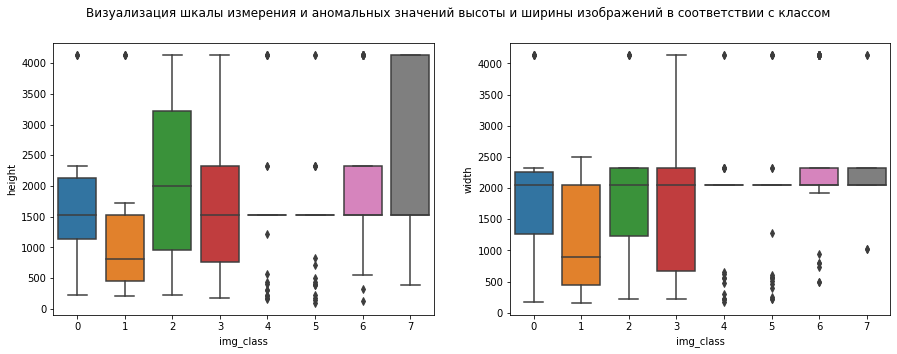

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Визуализация шкалы измерения и аномальных значений высоты и ширины изображений в соответствии с классом')
sns.boxplot(ax=axes[0], x="img_class", y="height", data=df)
sns.boxplot(ax=axes[1], x="img_class", y="width", data=df)

<AxesSubplot:ylabel='width'>

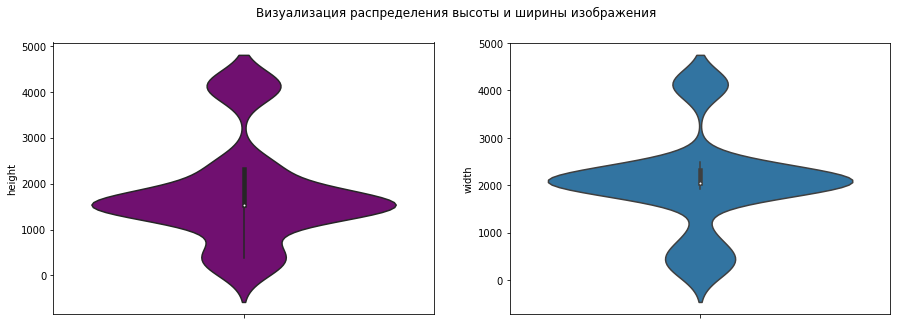

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Визуализация распределения высоты и ширины изображения ')
sns.violinplot(ax=axes[0], y = df['height'], color='purple')
sns.violinplot(ax=axes[1], y = df['width'])

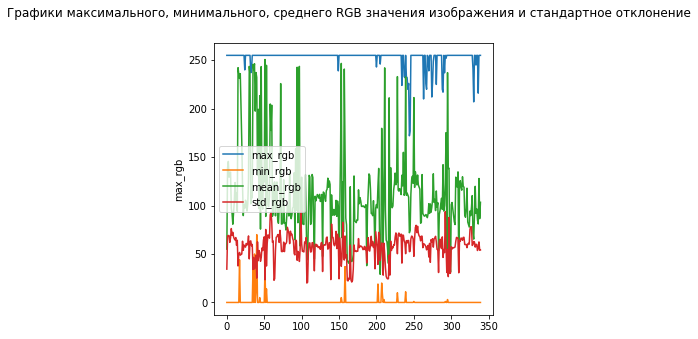

In [19]:
f, ax = plt.subplots(figsize=(5, 5))
f.suptitle('Графики максимального, минимального, среднего RGB значения изображения и стандартное отклонение')
sns.lineplot(label='max_rgb', data=df['max_rgb'])
sns.lineplot(label='min_rgb', data=df['min_rgb'])
sns.lineplot(label='mean_rgb', data=df['mean_rgb'])
sns.lineplot(label='std_rgb', data=df['std_rgb'])
plt.legend(fontsize=10)


Описание категориальных типов данных

In [20]:
df.describe(include = ['O'])

,img_class,path
count,340,340
unique,8,340
top,6,../data/Raw/BOTTLE_OPENER\bottleopenerraw1.JPG
freq,82,1


In [22]:
for class_title, class_number in classes_dict.items():
    print (f"Класс номер {class_number} {class_title}: {len(df[df['img_class'] == str(class_number)])} ({len(df[df['img_class'] == str(class_number)])/len(df)*100:.2f}%)")
print (f"Всего: {len(df)}")

Класс номер 0 bottle_opener: 30 (8.82%)
Класс номер 1 bread_knife: 24 (7.06%)
Класс номер 2 can_opener: 19 (5.59%)
Класс номер 3 dessert_spoon: 33 (9.71%)
Класс номер 4 dinner_fork: 59 (17.35%)
Класс номер 5 dinner_knife: 52 (15.29%)
Класс номер 6 fish_slice: 82 (24.12%)
Класс номер 7 kitchen_knife: 41 (12.06%)
Всего: 340


Цветовые гистограммы по трём каналам

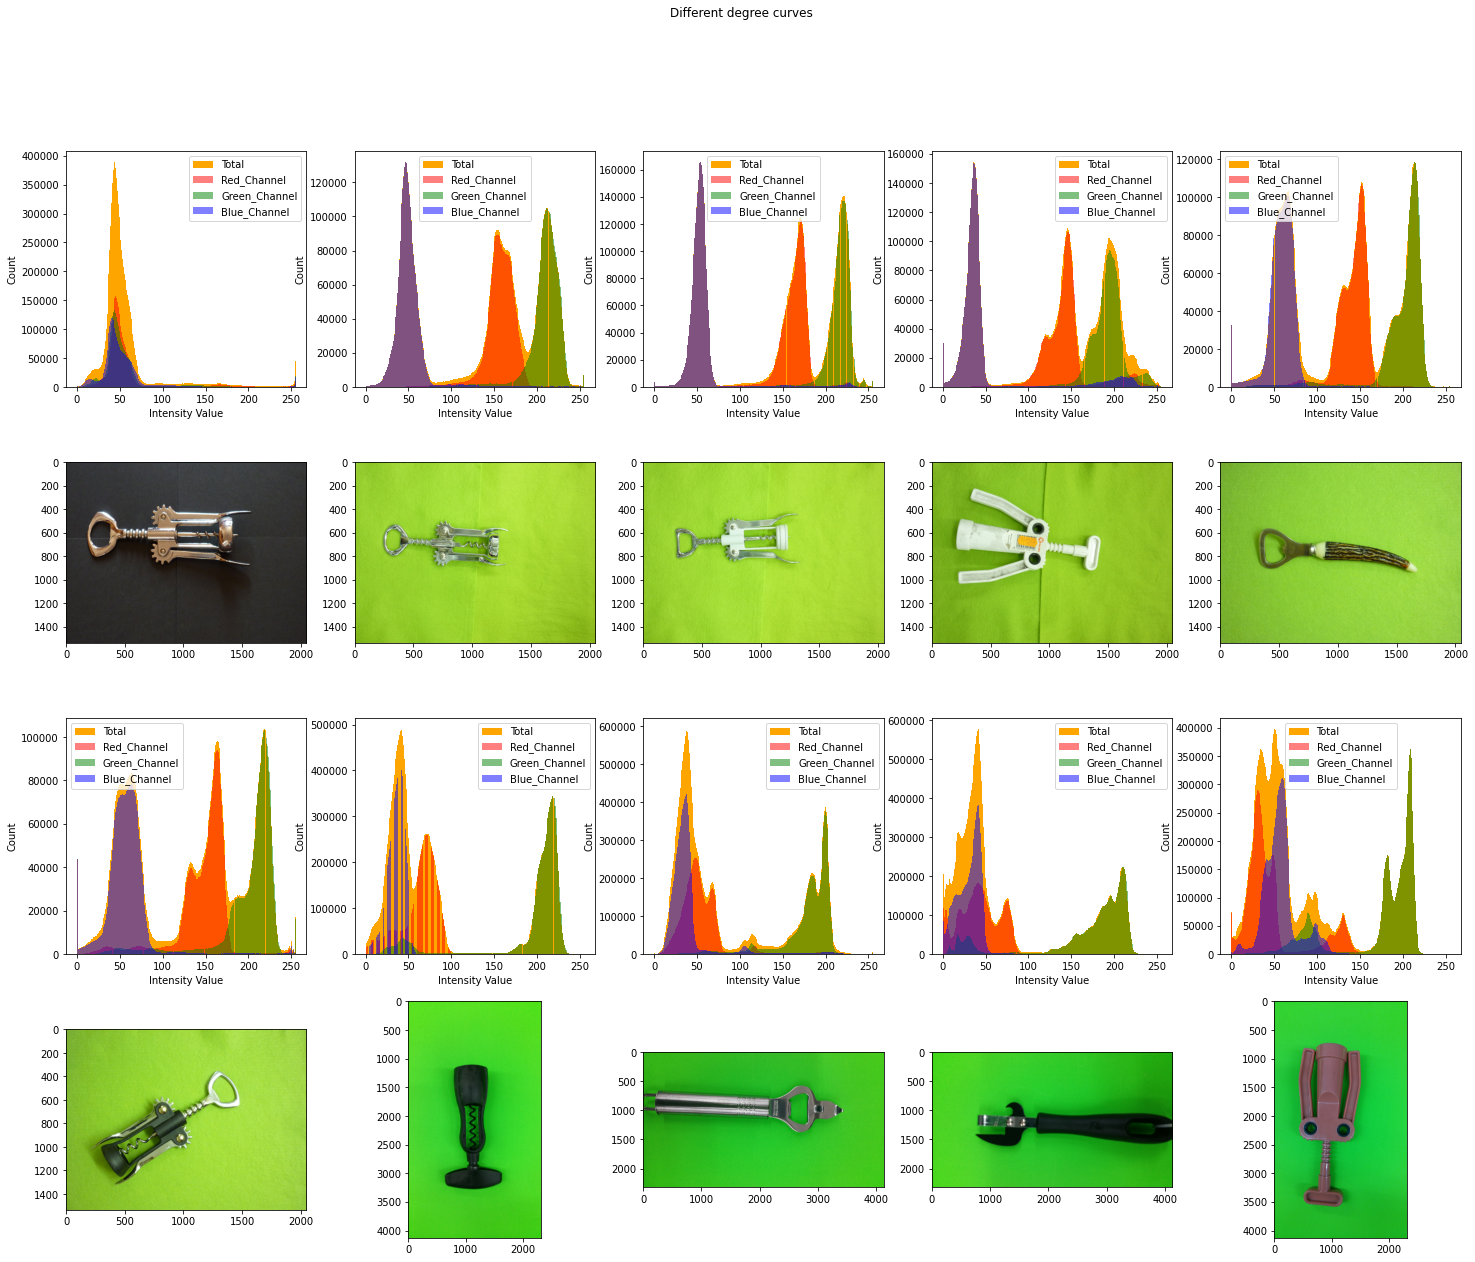

In [23]:
draw_pictures_with_hists(df[:10])

Корреляционная матрица датасета


<AxesSubplot:>

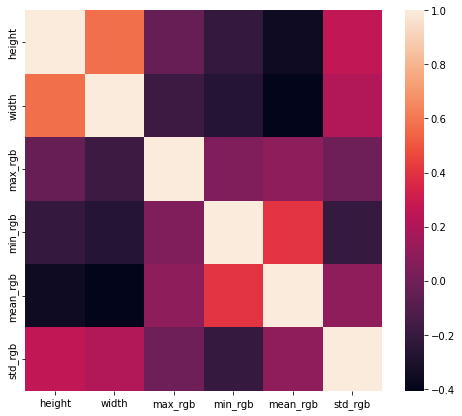

In [25]:
print("Корреляционная матрица датасета")
plt.rcParams['figure.figsize'] = (8,7)
sns.heatmap(df.drop('dimension', axis=1).corr())

Таблица рассеивания классов фотографий от всех факторов


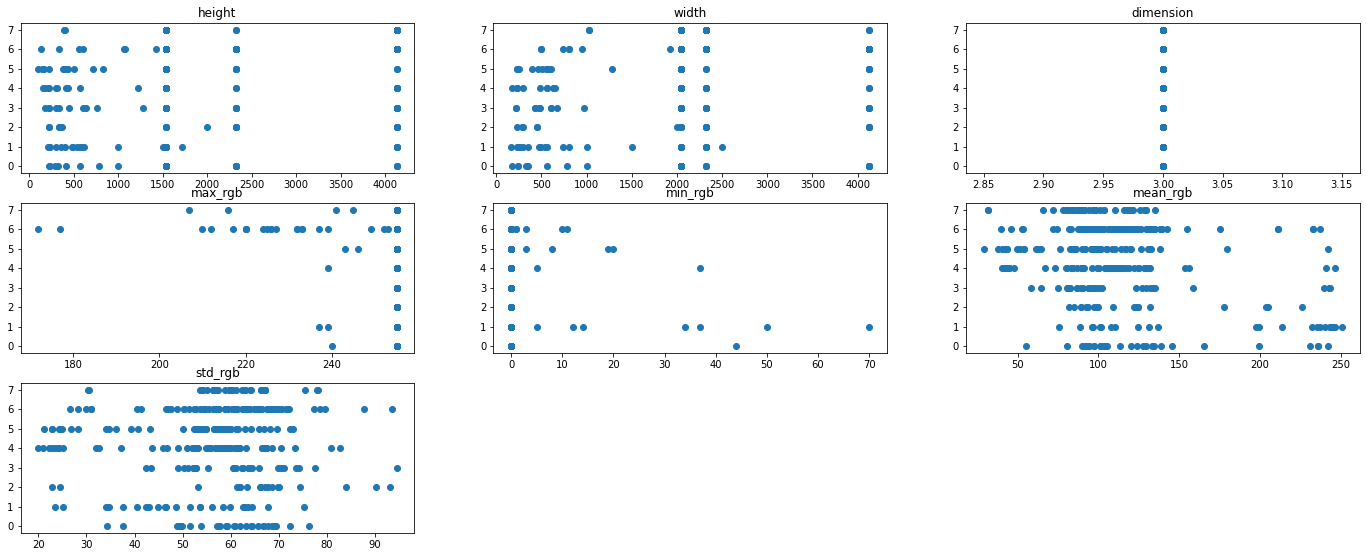

In [26]:
print('Таблица рассеивания классов фотографий от всех факторов')
plt.rcParams['figure.figsize'] = (24,16)
for i, col in enumerate(df.columns[2:]):
    plt.subplot(5, 3, i+1)
    plt.scatter(df[col], df['img_class'])
    plt.title(col)

## Моделирование

In [3]:
img_path = "../data/Raw/"
img_width, img_height = 128, 128
batch_size = 128
datagen = ImageDataGenerator(
    rescale=1. / 255., 
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.3)
train_generator = datagen.flow_from_directory(img_path, 
                                    subset='training',
                                    target_size=(img_height, img_width), 
                                    batch_size=batch_size, 
                                    shuffle=False, 
                                    class_mode='categorical', 
                                    color_mode='rgb')
valid_generator = datagen.flow_from_directory(img_path, 
                                    subset='validation',
                                    target_size=(img_height, img_width), 
                                    batch_size=batch_size, 
                                    shuffle=False, 
                                    class_mode='categorical', 
                                    color_mode='rgb')


Found 644 images belonging to 20 classes.
Found 263 images belonging to 20 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


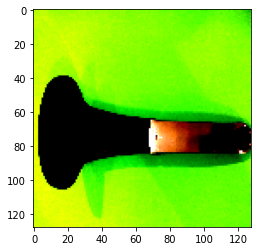

In [4]:
plt.imshow(train_generator[2][0][0])

In [5]:
class_num = train_generator.num_classes

Модель

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=train_generator[0][0].shape[1:], padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_constraint=maxnorm(3), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [7]:
epochs = 1
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
seed = 21
np.random.seed(seed)
model.fit(train_generator, validation_data=valid_generator, epochs=epochs)

6/6 [==============================] - 109s 21s/step - loss: 3.6513 - accuracy: 0.0776 - val_loss: 3.1156 - val_accuracy: 0.1103


Оценка качества

In [8]:
scores = model.evaluate(valid_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 11.03%


In [9]:
scores

[3.1156322956085205, 0.11026615649461746]